==================Load Dataset========================

The shape of train instance is: (60000, 128)

The shape of label is: (60000,)

The shape of test dataset is: (10000, 128)

Load Successful

==================Check Class Balance=================


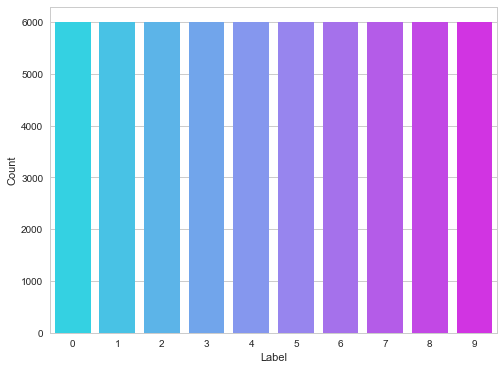

Each class is evenly distributed.

==================Scaled Dataset======================
'standardize' took 0.13 sec
'standardize' took 0.02 sec

Scaled complete

===========check our createKfold function with scikit-learn k-fold cross-validation===============
sk_learn kfold function
40000 20000 [    0     2     3 ... 59996 59997 59998] [    1     4     6 ... 59989 59992 59999]
40000 20000 [    1     2     4 ... 59994 59996 59999] [    0     3     8 ... 59995 59997 59998]
40000 20000 [    0     1     3 ... 59997 59998 59999] [    2     5     9 ... 59993 59994 59996]

diy createKFolds function
40000 20000 [12628 39991  8525 ... 38158   860 15795] [    2     5     9 ... 59993 59994 59996]
40000 20000 [37730 39991  8279 ... 44732 38158 56422] [    2     5     9 ... 59993 59994 59996]
40000 20000 [12628 37730  8525 ...   860 15795 56422] [    2     5     9 ... 59993 59994 59996]

add the sort to make sure that even after shuffling, the index assigned are the same

sk_train == diy_train :

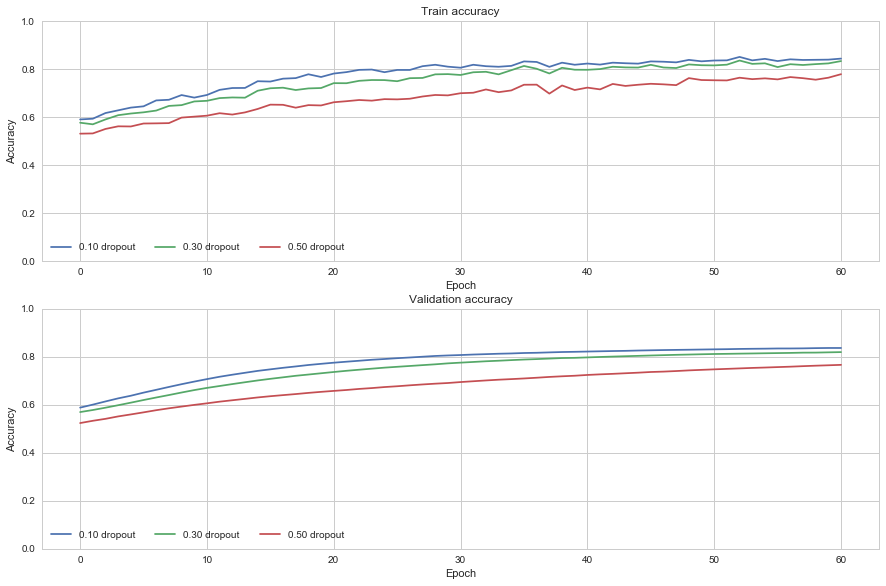

'dropout_Benchmark' took 403.54 sec
Dropout : 0.1
SGD momentum
'processing' took 46.37 sec
SGD momentum
'processing' took 47.44 sec
SGD momentum
'processing' took 53.38 sec
average train acc with only Dropout: 0.8881092896174863
average val acc with only Dropout: 0.8840131147540983
average training loss with only Dropout: 0.29163648758749167
Dropout : 0.3
SGD momentum
'processing' took 48.80 sec
SGD momentum
'processing' took 47.92 sec
SGD momentum
'processing' took 51.41 sec
average train acc with only Dropout: 0.8770601092896176
average val acc with only Dropout: 0.8737842896174863
average training loss with only Dropout: 0.3388607780849934
Dropout : 0.5
SGD momentum
'processing' took 50.56 sec
SGD momentum
'processing' took 51.88 sec
SGD momentum
'processing' took 48.40 sec
average train acc with only Dropout: 0.8651293260473589
average val acc with only Dropout: 0.8622058287795992
average training loss with only Dropout: 0.38791827775412135


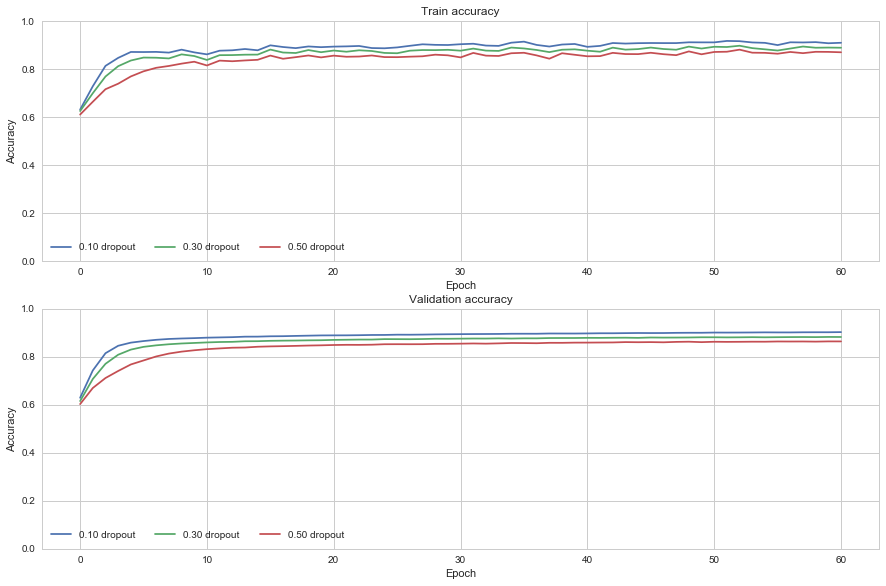

'dropout_Benchmark' took 447.14 sec
Dropout : 0.1
Adam
'processing' took 54.59 sec
Adam
'processing' took 54.57 sec
Adam
'processing' took 54.43 sec
average train acc with only Dropout: 0.9556065573770491
average val acc with only Dropout: 0.9392693989071037
average training loss with only Dropout: 0.14412551526456377
Dropout : 0.3
Adam
'processing' took 55.61 sec
Adam
'processing' took 54.87 sec
Adam
'processing' took 54.57 sec
average train acc with only Dropout: 0.9401612021857924
average val acc with only Dropout: 0.9269804644808745
average training loss with only Dropout: 0.19270685398508153
Dropout : 0.5
Adam
'processing' took 55.50 sec
Adam
'processing' took 54.91 sec
Adam
'processing' took 54.75 sec
average train acc with only Dropout: 0.9259307832422586
average val acc with only Dropout: 0.9148131147540984
average training loss with only Dropout: 0.24608879443539888


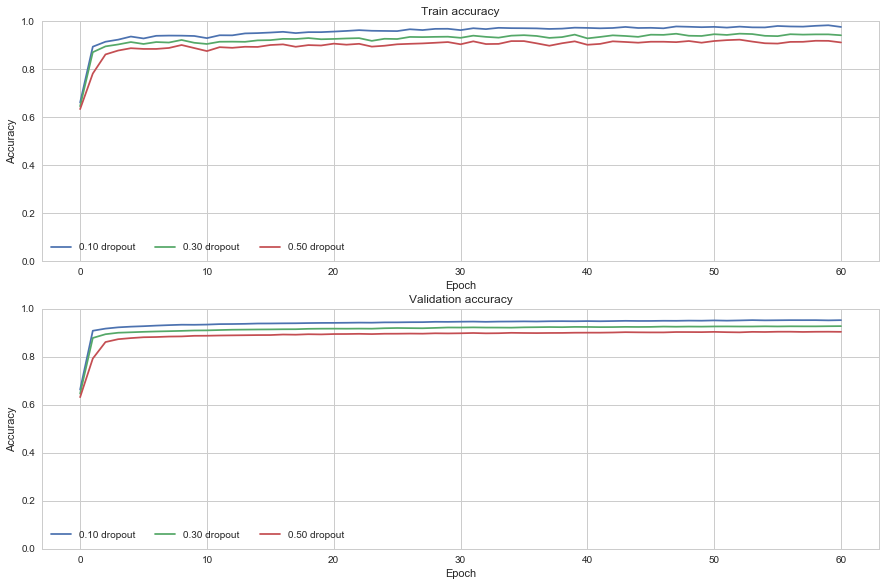

'dropout_Benchmark' took 494.75 sec

================Model 2 : Only BatchNorm=============================
Apply Batch Normalization without Dropout
SGD
'processing' took 44.54 sec
SGD
'processing' took 1168.41 sec
SGD
'processing' took 51.80 sec
average train acc with only BN: 0.7773715846994537
average val acc with only BN: 0.7750226775956285
average training loss with only BN: 0.7188566654186779


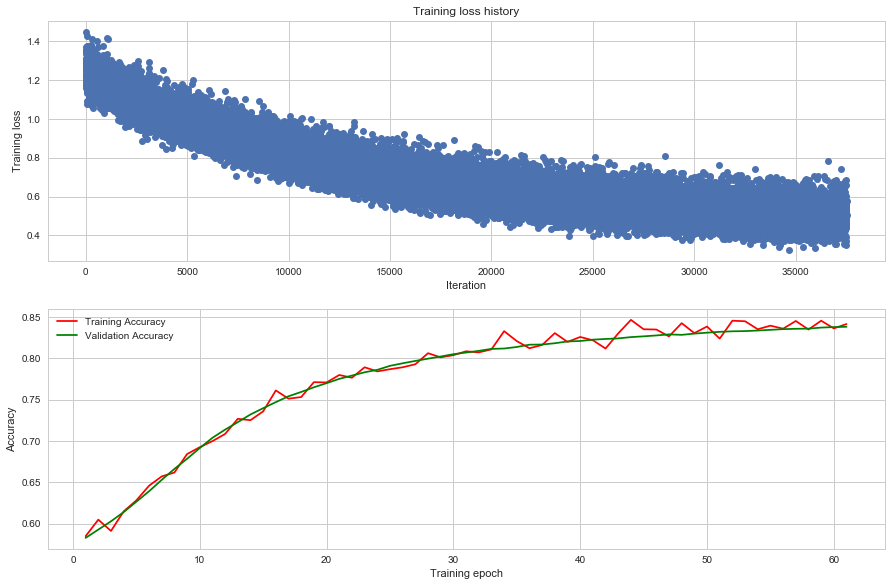

'bn_Benchmark' took 1265.48 sec
Apply Batch Normalization without Dropout
SGD momentum
'processing' took 49.79 sec
SGD momentum
'processing' took 50.90 sec
SGD momentum
'processing' took 51.11 sec
average train acc with only BN: 0.8971967213114754
average val acc with only BN: 0.8930904371584699
average training loss with only BN: 0.31284546647982464


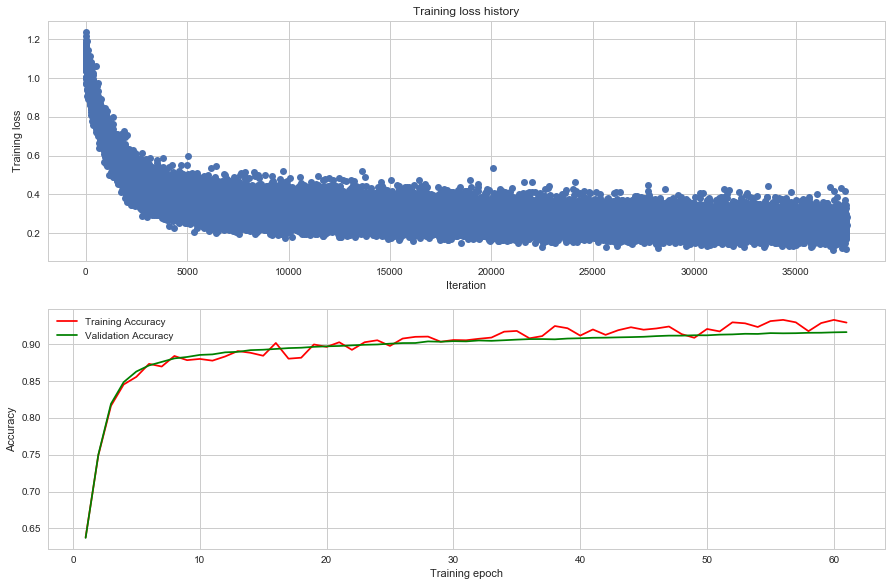

'bn_Benchmark' took 152.45 sec
Apply Batch Normalization without Dropout
Adam
'processing' took 61.80 sec
Adam
'processing' took 59.99 sec
Adam
'processing' took 59.66 sec
average train acc with only BN: 0.9688142076502733
average val acc with only BN: 0.9480890710382516
average training loss with only BN: 0.11744568653553103


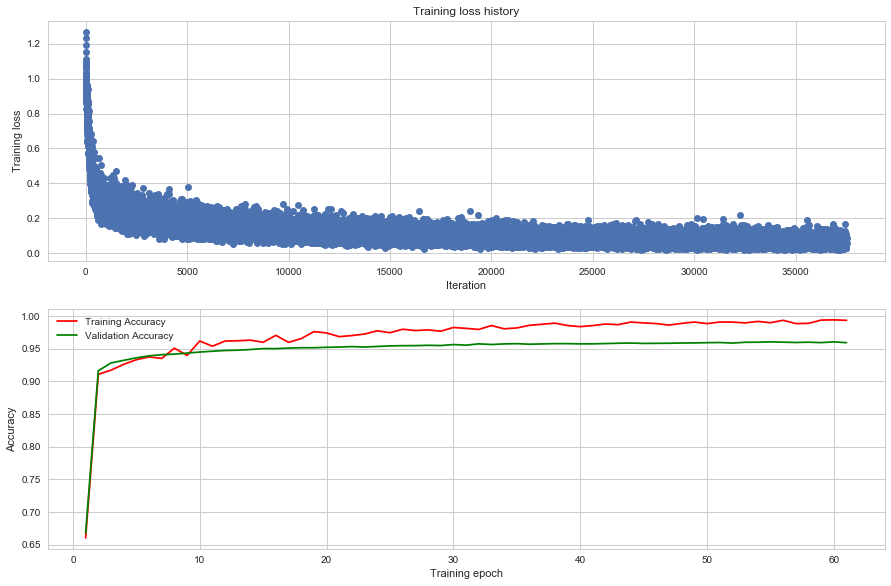

'bn_Benchmark' took 182.11 sec

================Model 3 : BN & Dropout[0.5]=============================
Apply both Dropout and Batch Normalisation
SGD
'processing' took 68.35 sec
SGD
'processing' took 67.47 sec
SGD
'processing' took 67.81 sec
average train acc with BN&Dropout: 0.6877650273224045
average train acc with BN&Dropout: 0.6831079234972676
average training loss with BN&Dropout: 1.545959964543978


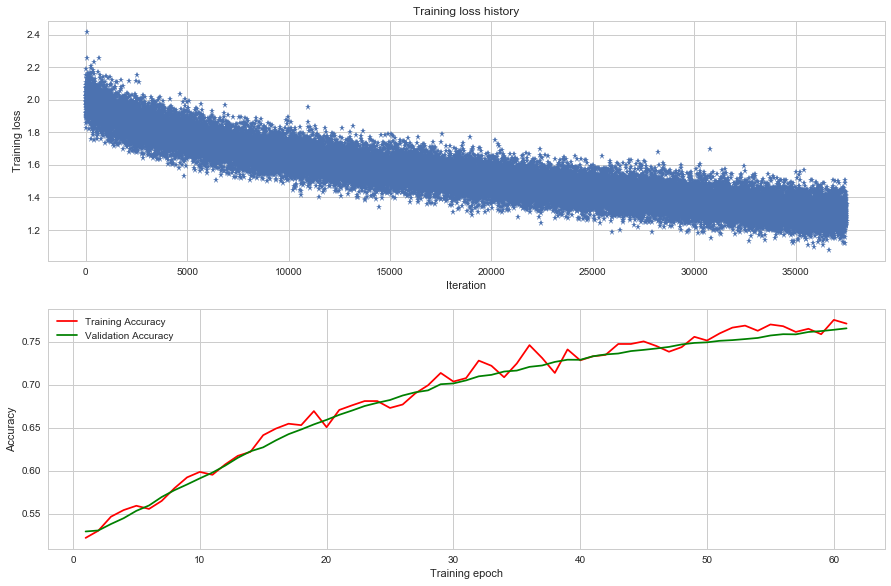

'bndo_Benchmark' took 204.33 sec
Apply both Dropout and Batch Normalisation
SGD momentum
'processing' took 72.30 sec
SGD momentum
'processing' took 71.36 sec
SGD momentum
'processing' took 72.33 sec
average train acc with BN&Dropout: 0.8408797814207651
average train acc with BN&Dropout: 0.8392475409836063
average training loss with BN&Dropout: 0.6954490314279662


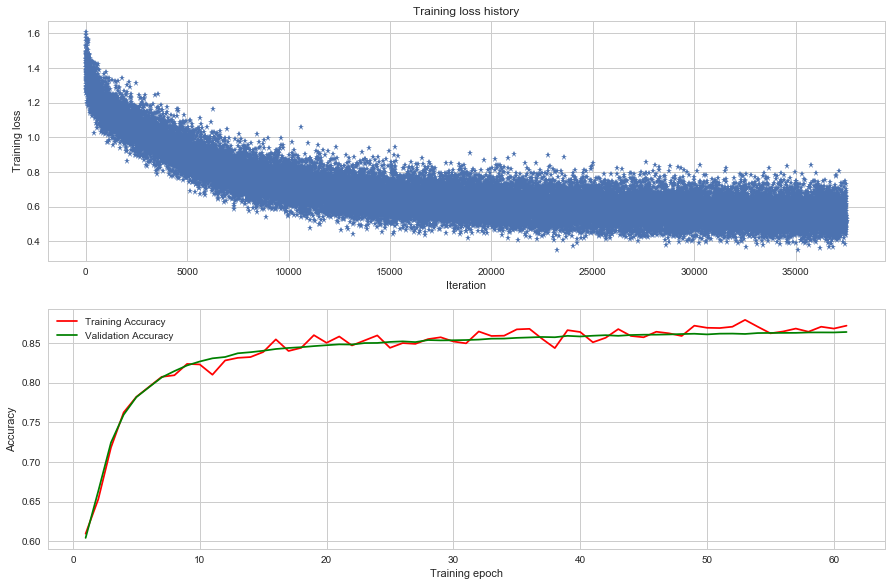

'bndo_Benchmark' took 216.69 sec
Apply both Dropout and Batch Normalisation
Adam
'processing' took 88.53 sec
Adam
'processing' took 86.70 sec
Adam
'processing' took 86.72 sec
average train acc with BN&Dropout: 0.8939890710382513
average train acc with BN&Dropout: 0.8880008196721312
average training loss with BN&Dropout: 0.43931890583274263


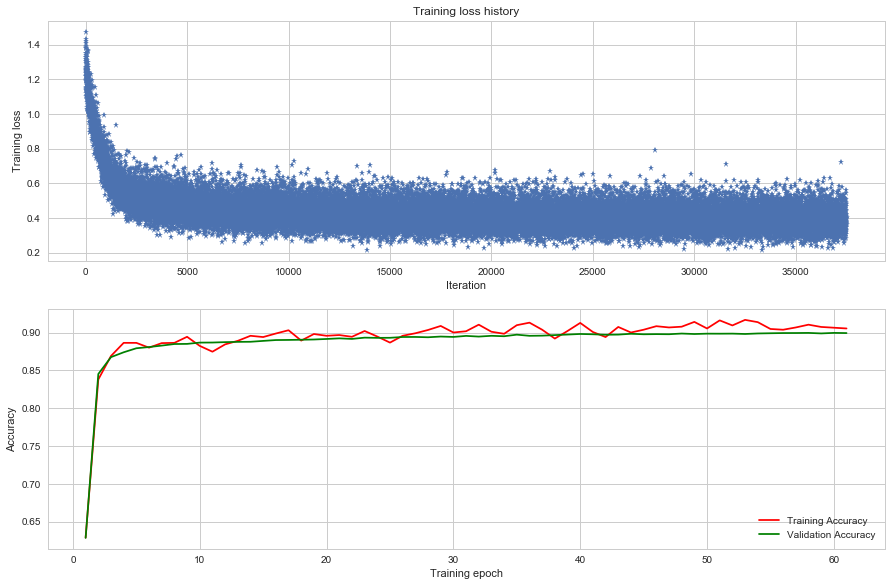

'bndo_Benchmark' took 262.63 sec

So by compare with "Only Dropout","Only BN" and "BN & Dropout", we found that "Only BN" performed better. Then we decided to use "Only BN" to train our model and make Hyperparametric tuning for it.

==================Hyperparametric tuning=======================
In this section, we opt to use Adam as the training time is significantly faster than SGD Momentum. We also experimented with various combination of parameters.
Comparing the loss chart, we discovered a trend :

BN can be regarded as a constraint on the input sample. The biggest role is to accelerate convergence, reduce the model dependence on dropout as well as careful weight initialnization,the advantage of BN is it allow model to adopt higher learning rate, which can results in the convergence speed up.

But for the simplicity of the code and the flexibility of the final run time, we have not shown the process of all the adjustments.Here we only show the range of parameters we finally deline

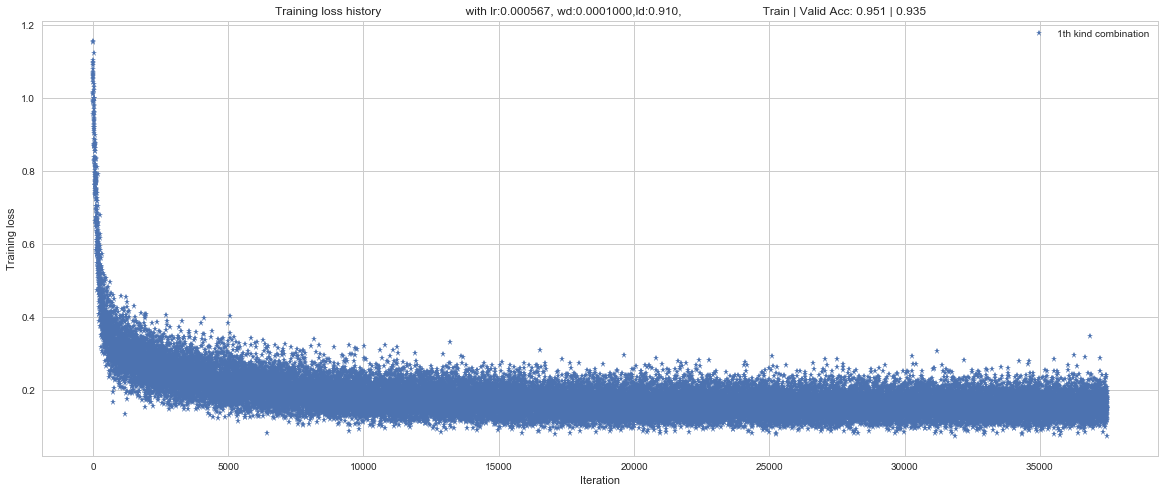

Adam
'processing' took 57.83 sec
Adam
'processing' took 57.87 sec
Adam
'processing' took 59.41 sec


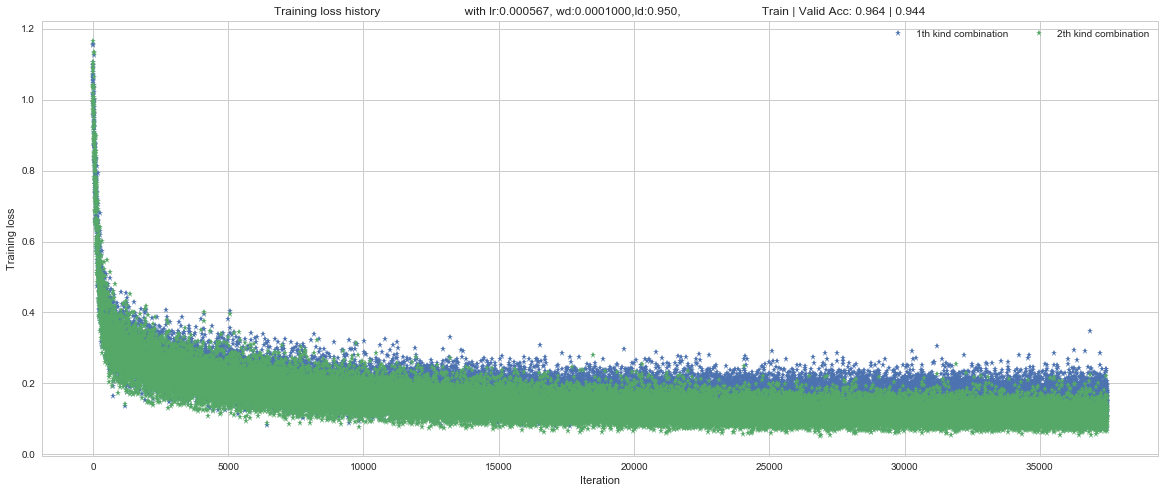

Adam
'processing' took 58.06 sec
Adam
'processing' took 57.95 sec
Adam
'processing' took 58.02 sec


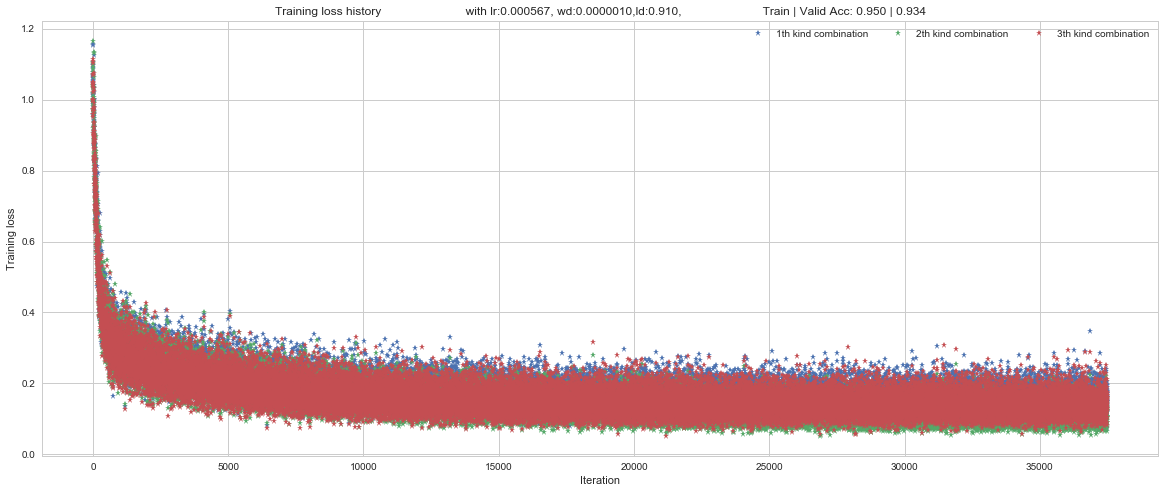

Adam
'processing' took 57.88 sec
Adam
'processing' took 57.81 sec
Adam
'processing' took 57.63 sec


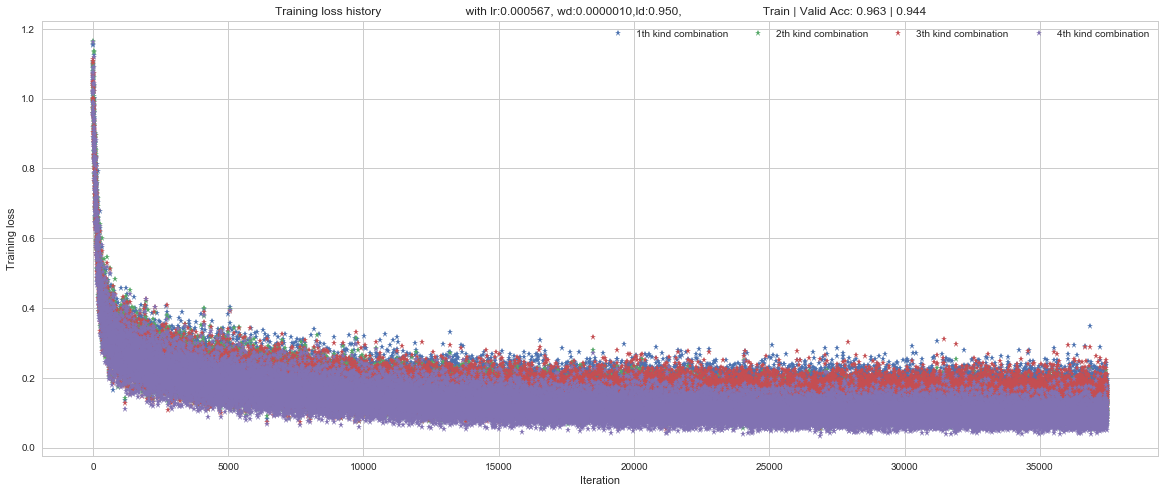

Adam
'processing' took 58.04 sec
Adam
'processing' took 57.91 sec
Adam
'processing' took 58.13 sec


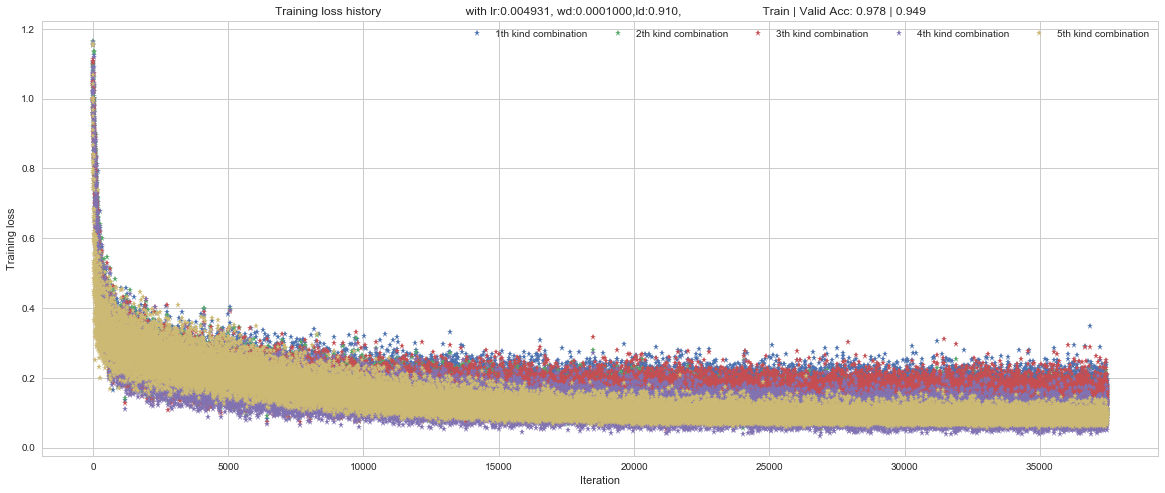

Adam
'processing' took 57.93 sec
Adam
'processing' took 57.76 sec
Adam
'processing' took 57.77 sec


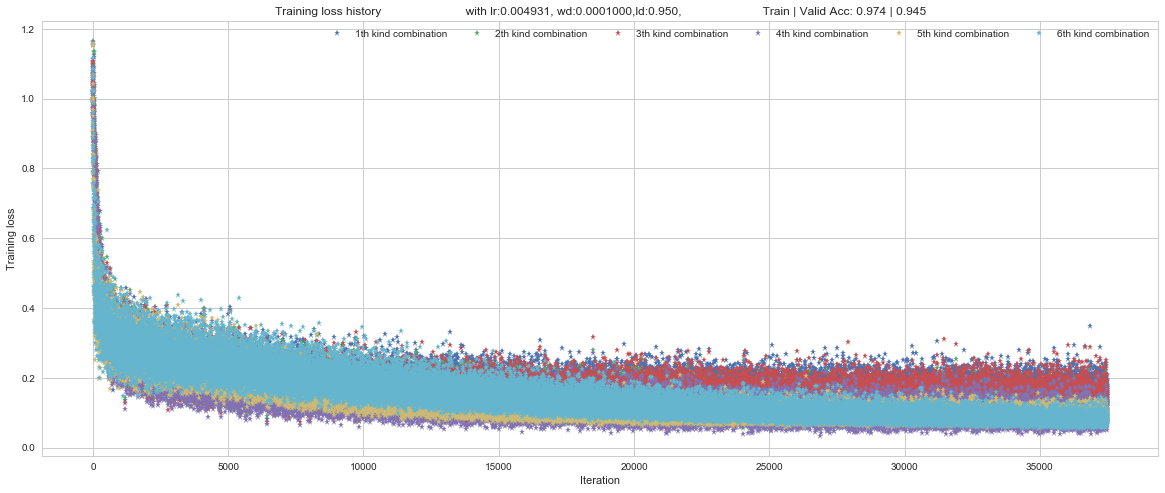

Adam
'processing' took 57.83 sec
Adam
'processing' took 57.77 sec
Adam
'processing' took 57.87 sec


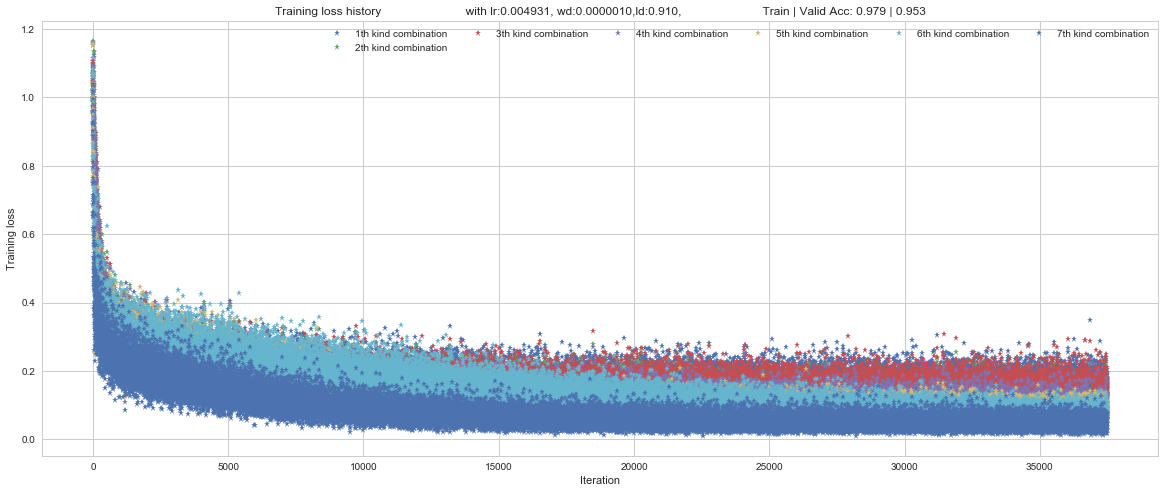

Adam
'processing' took 57.88 sec
Adam
'processing' took 58.04 sec
Adam
'processing' took 57.80 sec


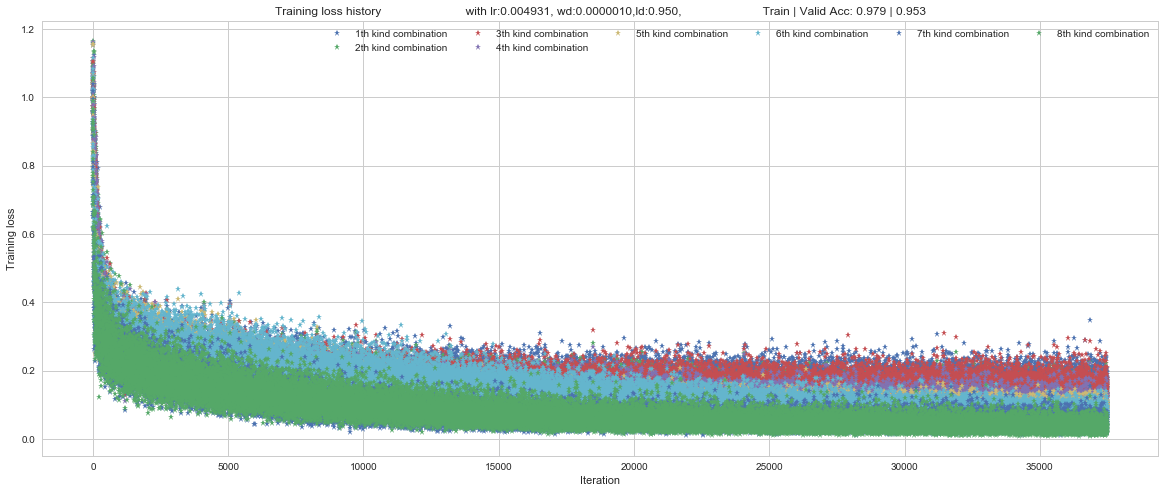


Params tuning time:23.391245 minutes 
lr:0.000567,wd:0.0001000,ld:0.910,Train| Valid Acc: 95.104% | 93.510%
lr:0.000567,wd:0.0001000,ld:0.950,Train| Valid Acc: 96.373% | 94.374%
lr:0.000567,wd:0.0000010,ld:0.910,Train| Valid Acc: 94.967% | 93.366%
lr:0.000567,wd:0.0000010,ld:0.950,Train| Valid Acc: 96.254% | 94.384%
lr:0.004931,wd:0.0001000,ld:0.910,Train| Valid Acc: 97.809% | 94.883%
lr:0.004931,wd:0.0001000,ld:0.950,Train| Valid Acc: 97.407% | 94.546%
lr:0.004931,wd:0.0000010,ld:0.910,Train| Valid Acc: 97.927% | 95.312%
lr:0.004931,wd:0.0000010,ld:0.950,Train| Valid Acc: 97.917% | 95.296%

The above results proved our conclusion again, after apply BN,we can choose relatively higher learning rate. And weight decay params effect the training time.

Also refer to above result we can see that:
The model with:
learning_rate 4.93056310e-03
weight_decay 1e-6
learning_rate_decay 0.95
can perform best: Train| Valid Acc: 97.917% | 95.296%

At the end of training, the Run fuction swap the best

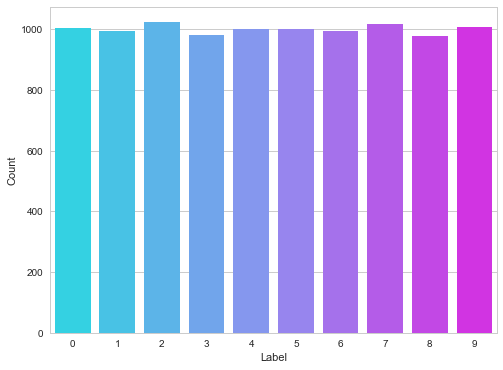

In [2]:
import superMLP